In [ ]:
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

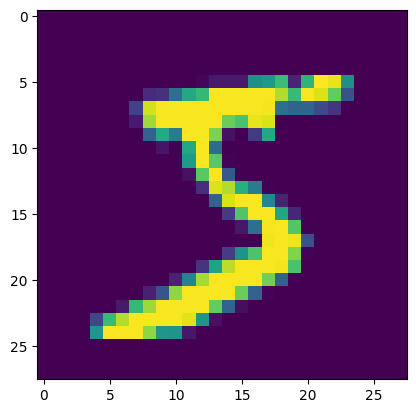

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

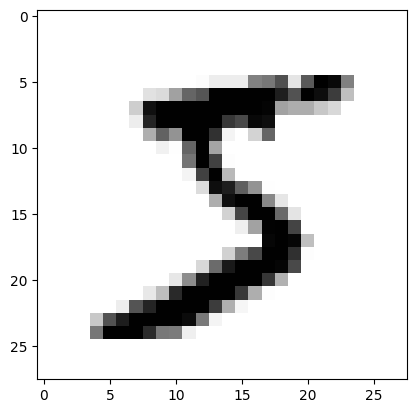

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

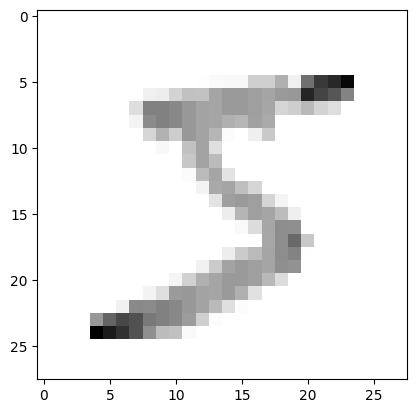

In [ ]:
# normalization process
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
y_train[0]

5

In [ ]:
# convolution process
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (60000, 28, 28, 1)


In [ ]:
# creating deep learning architectutr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
#creating a neural network
model=Sequential()

#first conv layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd conv layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd conv layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_trainr,y_train,epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 76s 57ms/step - loss: 0.3463 - accuracy: 0.8950 - val_loss: 0.1440 - val_accuracy: 0.9540
Epoch 2/10
1313/1313 [==============================] - 73s 55ms/step - loss: 0.1077 - accuracy: 0.9669 - val_loss: 0.1012 - val_accuracy: 0.9691
Epoch 3/10
1313/1313 [==============================] - 69s 52ms/step - loss: 0.0747 - accuracy: 0.9774 - val_loss: 0.0990 - val_accuracy: 0.9701
Epoch 4/10
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0742 - val_accuracy: 0.9779
Epoch 5/10
1313/1313 [==============================] - 69s 52ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0694 - val_accuracy: 0.9808
Epoch 6/10
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0709 - val_accuracy: 0.9797
Epoch 7/10
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0564 -

In [ ]:
predictions=model.predict([x_testr])

1875/1875 [==============================] - 26s 14ms/step


In [ ]:
print(predictions)

[[1.7371953e-08 1.8156166e-08 4.4214259e-09 ... 3.6674397e-10
  3.0014960e-06 1.5780611e-06]
 [9.9999994e-01 8.7870396e-13 5.0571400e-09 ... 1.3717356e-10
  5.2216053e-12 8.5770413e-09]
 [1.6670955e-10 2.7389430e-07 6.1269100e-07 ... 4.2626860e-07
  2.0322265e-11 1.0053222e-09]
 ...
 [3.4003616e-08 9.7490727e-10 1.0427625e-11 ... 2.0345704e-11
  9.3268142e-07 1.1900652e-05]
 [1.2990259e-08 1.3187311e-07 1.8331671e-09 ... 2.7330097e-10
  7.6588907e-07 3.1227582e-08]
 [1.4357054e-09 9.7560626e-10 4.3312897e-07 ... 2.3040135e-08
  9.9980640e-01 1.9245067e-04]]


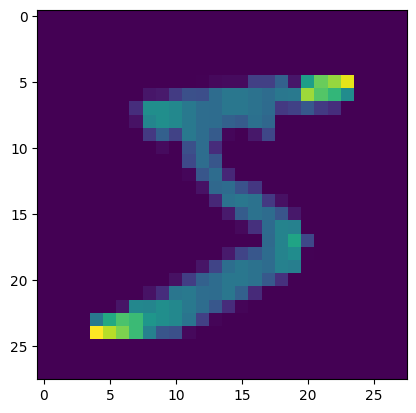

In [ ]:
plt.imshow(x_testr[0])

In [ ]:
print(np.argmax(predictions[0]))

5


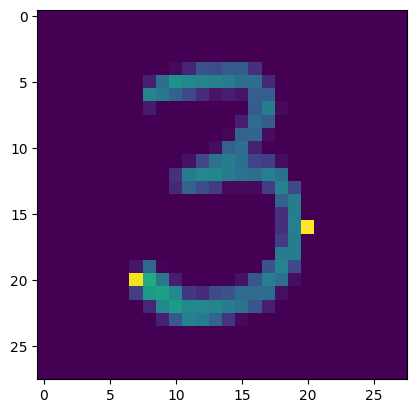

In [ ]:
plt.imshow(x_testr[50])

In [ ]:
print(np.argmax(predictions[50]))

3


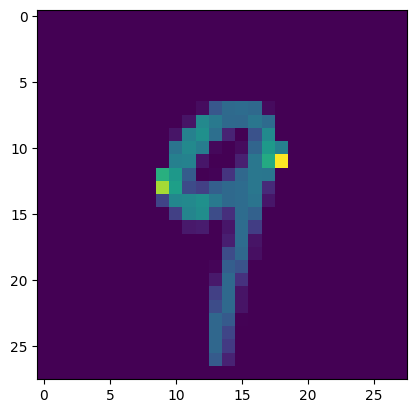

In [ ]:
plt.imshow(x_testr[600])

In [ ]:
print(np.argmax(predictions[600]))

9


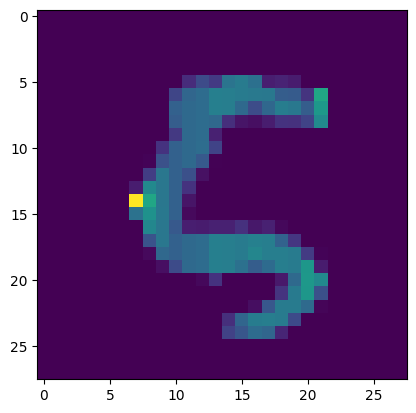

In [ ]:
plt.imshow(x_testr[2000])

In [ ]:
print(np.argmax(predictions[2000]))

5


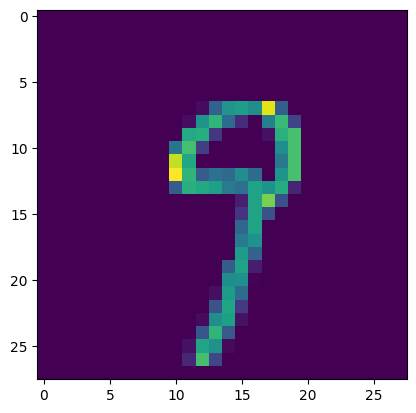

In [ ]:
plt.imshow(x_testr[1500])


In [ ]:
print(np.argmax(predictions[1500]))

9
